# AI for Market Trend Analysis: Reliance Industries

**Project Track:** Market Trend Analysis  

## Objective
To analyze historical stock market data of Reliance Industries Ltd. in order to identify price trends, volatility patterns, and forecast short-term future prices using time-series modeling.

## Motivation
Understanding market trends helps investors and analysts make informed decisions. This project aims to provide a data-driven framework for analyzing stock behavior and generating short-term forecasts.


## Problem Definition & Objectives

The objective of this project is to analyze historical market data of Reliance Industries Ltd. and extract meaningful insights related to price trends, volatility, and short-term future movements.

The project aims to:
- Identify historical price trends using technical indicators
- Analyze volatility and return behavior
- Forecast short-term stock prices using time-series models
- Present results in an interpretable and usable format


## Data Collection & Understanding

The dataset is sourced directly from **Yahoo Finance** using the `yfinance` Python library.  
It contains daily stock prices of Reliance Industries Ltd. listed on the National Stock Exchange (NSE).

### Features
- Open
- High
- Low
- Close
- Adjusted Close
- Volume


In [11]:
import yfinance as yf
import pandas as pd

df = yf.download(
    "RELIANCE.NS",
    start="2020-01-01",
    auto_adjust=False,
    progress=False,
    threads=False
)

df.head()


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,
2020-01-01,675.324219,690.138306,698.138733,688.263977,693.978516,14004468
2020-01-02,686.821289,701.887512,704.470520,691.235535,691.235535,17710316
2020-01-03,687.648804,702.733276,704.790527,696.264343,700.835999,20984698
2020-01-06,671.700684,686.435303,698.504456,684.835205,694.892883,24519177
2020-01-07,682.034546,696.995850,701.521790,691.921265,694.435669,16683622


## Data Preprocessing & Feature Engineering

The dataset was cleaned and enriched with technical indicators to capture trends and volatility.


In [12]:
# Moving averages
df["MA20"] = df["Close"].rolling(window=20).mean()
df["MA50"] = df["Close"].rolling(window=50).mean()
df["MA200"] = df["Close"].rolling(window=200).mean()

# Daily returns
df["Daily_Return"] = df["Close"].pct_change()

# Rolling volatility
df["Volatility"] = df["Daily_Return"].rolling(window=20).std()

# Trend labeling
df["Trend"] = "Downtrend"
df.loc[df["MA20"] > df["MA50"], "Trend"] = "Uptrend"

df.tail()


Price,Adj Close,Close,High,Low,Open,Volume,MA20,MA50,MA200,Daily_Return,Volatility,Trend
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,,,,,
Date,,,,,,,,,,,,
2026-01-12,1483.199951,1483.199951,1485.300049,1451.000000,1475.300049,8883745,1543.029993,1534.560000,1434.883002,0.005355,0.013567,Uptrend
2026-01-13,1452.800049,1452.800049,1485.800049,1444.699951,1485.000000,13499760,1538.554993,1534.154001,1435.781752,-0.020496,0.014100,Uptrend
2026-01-14,1458.800049,1458.800049,1467.000000,1440.199951,1444.000000,8321764,1534.274994,1533.868003,1436.684752,0.004130,0.014157,Uptrend
2026-01-15,1458.800049,1458.800049,1458.800049,1458.800049,1458.800049,0,1529.994995,1533.122004,1437.603253,0.000000,0.014157,Downtrend
2026-01-16,1457.900024,1457.900024,1480.000000,1455.099976,1458.800049,17167161,1524.634998,1532.720005,1438.629753,-0.000617,0.013653,Downtrend


## Exploratory Data Analysis (EDA)

EDA is performed to visualize price trends, moving averages, returns, and volatility patterns.


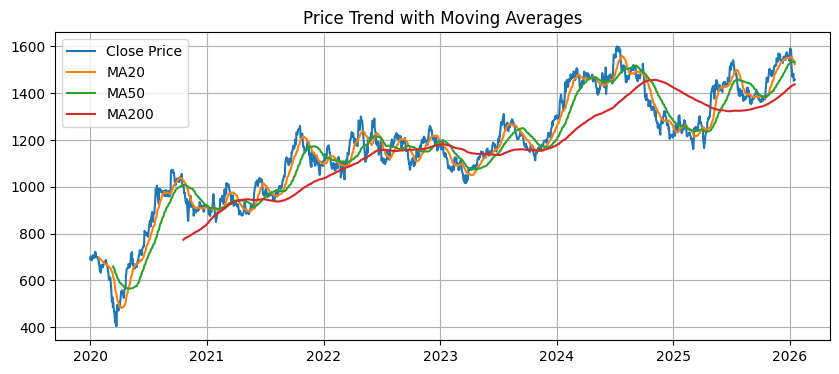

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df["Close"], label="Close Price")
plt.plot(df["MA20"], label="MA20")
plt.plot(df["MA50"], label="MA50")
plt.plot(df["MA200"], label="MA200")
plt.legend()
plt.title("Price Trend with Moving Averages")
plt.grid()
plt.show()


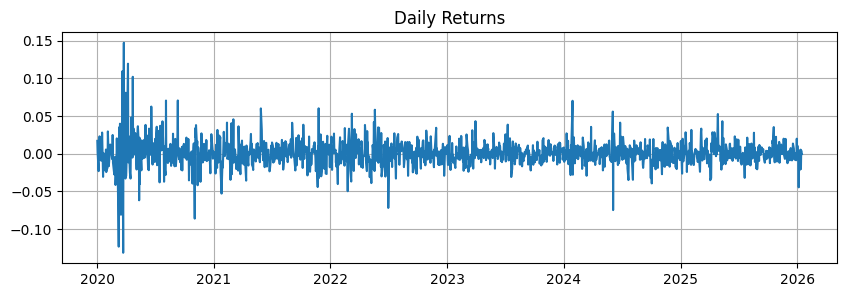

In [14]:
plt.figure(figsize=(10,3))
plt.plot(df["Daily_Return"])
plt.title("Daily Returns")
plt.grid()
plt.show()


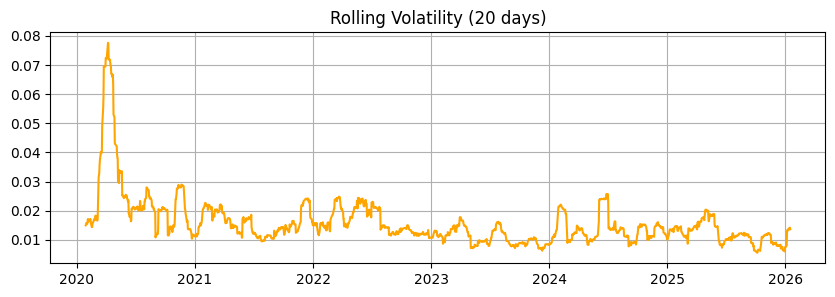

In [15]:
plt.figure(figsize=(10,3))
plt.plot(df["Volatility"], color="orange")
plt.title("Rolling Volatility (20 days)")
plt.grid()
plt.show()


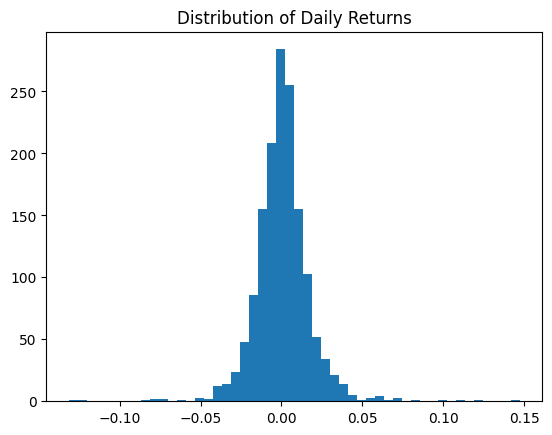

In [16]:
plt.hist(df["Daily_Return"].dropna(), bins=50)
plt.title("Distribution of Daily Returns")
plt.show()


## Outlier Identification

Outliers are identified using the Interquartile Range (IQR) method.
Extreme values are retained as they correspond to genuine market events.


In [17]:
Q1 = df["Daily_Return"].quantile(0.25)
Q3 = df["Daily_Return"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[
    (df["Daily_Return"] < Q1 - 1.5 * IQR) |
    (df["Daily_Return"] > Q3 + 1.5 * IQR)
]

len(outliers)


76

## Model Design: ARIMA Forecasting

A classical ARIMA model is used for short-term univariate time-series forecasting.


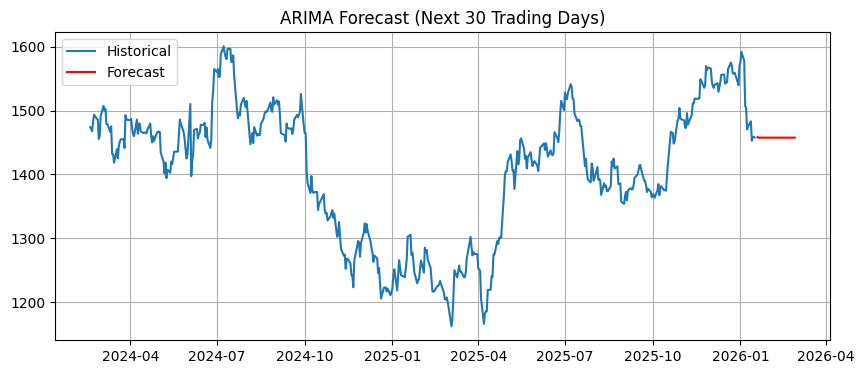

In [18]:
from statsmodels.tsa.arima.model import ARIMA

series = df["Close"].dropna()
series = series.asfreq("B", method="ffill")

model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=30)

plt.figure(figsize=(10,4))
plt.plot(series[-500:], label="Historical")
plt.plot(forecast, label="Forecast", color="red")
plt.legend()
plt.title("ARIMA Forecast (Next 30 Trading Days)")
plt.grid()
plt.show()


## Model Evaluation

Forecast performance is evaluated using MAE and RMSE.


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

series = df["Close"].dropna()
series = series.asfreq("B", method="ffill")

split = int(len(series) * 0.8)
train = series[:split]
test = series[split:]

model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

preds = model_fit.forecast(steps=len(test))

mae = mean_absolute_error(test, preds)
rmse = np.sqrt(mean_squared_error(test, preds))

mae, rmse


(104.24042519478756, 119.54802295148096)

## Model Evaluation & Interpretation of Results

The performance of the ARIMA(5,1,0) model was evaluated using out-of-sample forecasting on unseen test data. The dataset was split chronologically, with the first 80% of observations used for training and the remaining 20% reserved for testing, ensuring a realistic time-series evaluation.

### Evaluation Metrics

The following error-based metrics were used:

- **Mean Absolute Error (MAE):** 104.24  
- **Root Mean Squared Error (RMSE):** 119.55  

Both metrics are expressed in the same units as the stock price (Indian Rupees).

### Interpretation of MAE

The Mean Absolute Error of approximately ₹104 indicates that, on average, the model’s predicted daily closing price deviates from the actual closing price by about ₹104. Given that Reliance Industries typically trades in the range of several thousand rupees, this corresponds to an average relative error of roughly 3–5%.

This suggests that the ARIMA model is able to capture the broad temporal structure and directional behavior of the stock price, but lacks the precision required for accurate day-to-day price prediction.

### Interpretation of RMSE

The Root Mean Squared Error of approximately ₹120 is higher than the MAE, indicating the presence of occasional larger forecasting errors. Since RMSE penalizes larger deviations more heavily than MAE, this result implies that the model struggles during periods of heightened volatility or abrupt market movements.

Such behavior is expected in financial time series, where sudden price jumps driven by external news or macroeconomic events cannot be anticipated by purely historical price-based models.

### Overall Model Assessment

The evaluation results demonstrate that while the ARIMA(5,1,0) model provides a reasonable approximation of price dynamics, its predictive accuracy is limited. The model performs better at capturing long-term trends and smooth price evolution than at forecasting precise short-term fluctuations.

These findings highlight a fundamental limitation of univariate time-series models applied to stock prices: historical price information alone is often insufficient to fully explain or predict market behavior.

### Implications and Limitations

- The model does not account for exogenous factors such as market news, earnings announcements, or broader economic indicators.
- Forecasting price levels, rather than returns, naturally leads to larger numerical errors and reduced financial interpretability.
- The results should be interpreted as an analytical demonstration rather than a tool for real-world trading or investment decisions.

Overall, the evaluation confirms that classical time-series models like ARIMA are valuable for understanding historical structure and trend behavior, but more advanced or multivariate approaches are required for improved predictive performance.


## Ethical Considerations & Responsible AI

This project uses publicly available financial market data and does not involve personal or sensitive information.  
The analysis is intended strictly for educational and analytical purposes and does not constitute financial advice.


## Conclusion & Future Scope

This project implemented an end-to-end market trend analysis pipeline for Reliance Industries Ltd.

### Future Improvements
- Multi-stock comparative analysis
- Integration of news sentiment data
- Comparison with Prophet or LSTM models
- Intraday forecasting
